# Aequitas

Imports:

In [145]:
import yaml

import sys

from datetime import (date, datetime)

import os

import pickle

import re

In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import pickle

## Análisis Aequitas
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
from aequitas.plotting import Plot

In [259]:
df=pd.read_csv("/home/mariana/Documents/DPA/dpa_2021/data/raw/Food_Inspections.csv")

In [200]:
df= df.rename(columns={'Inspection ID':'inspection-id',
                                 'Facility Type':'facility_type'})

In [20]:
df["inspection-id"] = df["inspection-id"].astype("|S")

In [269]:
df_aeq = pd.read_pickle(r'/home/mariana/Documents/DPA/dpa_2021/data/pickles/aequitas1.pkl')
df_aeq

,label_value,score,zip-income-class
0,1,1,High
1,1,1,Low
2,1,1,Low
3,1,1,Medium
4,1,1,Low
...,...,...,...
65906,1,1,Medium
65907,1,1,Medium
65908,1,1,Medium
65909,1,1,Medium


In [270]:
list(df_aeq.columns)

['label_value', 'score', 'zip-income-class']

In [292]:
df_aeq= df_aeq.rename(columns={'zip-income-class':'reference_group'})
df_aeq

,label_value,score,reference_group
0,1,1.0,High
1,1,1.0,Low
2,1,1.0,Low
3,1,1.0,Medium
4,1,1.0,Low
...,...,...,...
65906,1,1.0,Medium
65907,1,1.0,Medium
65908,1,1.0,Medium
65909,1,1.0,Medium


In [293]:
df_aeq.reference_group.unique()

array(['High', 'Low', 'Medium', 'Other'], dtype=object)

EDA

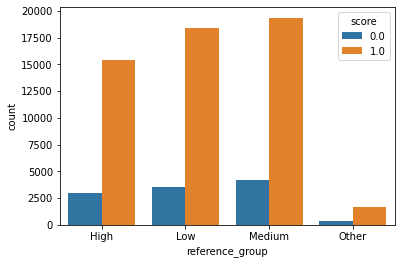

In [295]:
by_zip_income_class = sns.countplot(x="reference_group", hue="score", 
                        data=df_aeq[df_aeq.reference_group.isin(['High', 'Low', 'Medium', 'Other'])])


## Aequitas

In [274]:
def group(df_aeq):
    """
     args:
         df (dataframe):Recibe el data frame que tiene los features sobre los que queremos medir el sesgo entre los diferentes grupos.

     returns:
         -
     """
     # print("Métricas de ")
    #tables
    g = Group()
    xtab, attrbs = g.get_crosstabs(df_aeq)
    absolute_metrics = g.list_absolute_metrics(xtab)
    conteos_grupo=xtab[[col for col in xtab.columns if col not in absolute_metrics]]
    metricas_absolutas=xtab[['attribute_name', 'attribute_value']+[col for col in xtab.columns if col in absolute_metrics]].round(2)

    return xtab, conteos_grupo,metricas_absolutas

In [275]:
group(df_aeq)

(   model_id score_threshold      k   attribute_name attribute_value       tpr  \
 0         0      binary 0/1  54841  reference_group            High  0.921979   
 1         0      binary 0/1  54841  reference_group             Low  0.928339   
 2         0      binary 0/1  54841  reference_group          Medium  0.926801   
 3         0      binary 0/1  54841  reference_group           Other  0.927966   
 
         tnr       for       fdr       fpr       fnr       npv  precision  \
 0  0.364554  0.342770  0.220471  0.635446  0.078021  0.657230   0.779529   
 1  0.337683  0.289835  0.270591  0.662317  0.071661  0.710165   0.729409   
 2  0.388486  0.273181  0.248554  0.611514  0.073199  0.726819   0.751446   
 3  0.378378  0.312883  0.218787  0.621622  0.072034  0.687117   0.781213   
 
       pp    pn       ppr     pprev    fp    fn    tn     tp  group_label_pos  \
 0  15417  2967  0.281122  0.838610  3399  1017  1950  12018            13035   
 1  18382  3571  0.335187  0.837334  49

In [296]:
g = Group()
xtab, attrbs = g.get_crosstabs(df_aeq)

In [373]:
# la tabla de crosstabs
xtab

,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev
0,0,binary 0/1,54841,reference_group,High,0.921979,0.364554,0.342770,0.220471,0.635446,0.078021,0.657230,0.779529,15417,2967,0.281122,0.838610,3399,1017,1950,12018,13035,5349,18384,65911,0.709040
1,0,binary 0/1,54841,reference_group,Low,0.928339,0.337683,0.289835,0.270591,0.662317,0.071661,0.710165,0.729409,18382,3571,0.335187,0.837334,4974,1035,2536,13408,14443,7510,21953,65911,0.657906
2,0,binary 0/1,54841,reference_group,Medium,0.926801,0.388486,0.273181,0.248554,0.611514,0.073199,0.726819,0.751446,19360,4206,0.353021,0.821523,4812,1149,3057,14548,15697,7869,23566,65911,0.666087
3,0,binary 0/1,54841,reference_group,Other,0.927966,0.378378,0.312883,0.218787,0.621622,0.072034,0.687117,0.781213,1682,326,0.030670,0.837649,368,102,224,1314,1416,592,2008,65911,0.705179


In [298]:
attrbs

Index(['reference_group'], dtype='object')

In [299]:
absolute_metrics = g.list_absolute_metrics(xtab)
absolute_metrics

['tpr',
 'tnr',
 'for',
 'fdr',
 'fpr',
 'fnr',
 'npv',
 'precision',
 'ppr',
 'pprev',
 'prev']

In [300]:
xtab[[col for col in xtab.columns if col not in absolute_metrics]]

,model_id,score_threshold,k,attribute_name,attribute_value,pp,pn,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities
0,0,binary 0/1,54841,reference_group,High,15417,2967,3399,1017,1950,12018,13035,5349,18384,65911
1,0,binary 0/1,54841,reference_group,Low,18382,3571,4974,1035,2536,13408,14443,7510,21953,65911
2,0,binary 0/1,54841,reference_group,Medium,19360,4206,4812,1149,3057,14548,15697,7869,23566,65911
3,0,binary 0/1,54841,reference_group,Other,1682,326,368,102,224,1314,1416,592,2008,65911


In [301]:
xtab[['attribute_name', 'attribute_value']+[col for col in xtab.columns if col in absolute_metrics]].round(2)

,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev
0,reference_group,High,0.92,0.36,0.34,0.22,0.64,0.08,0.66,0.78,0.28,0.84,0.71
1,reference_group,Low,0.93,0.34,0.29,0.27,0.66,0.07,0.71,0.73,0.34,0.84,0.66
2,reference_group,Medium,0.93,0.39,0.27,0.25,0.61,0.07,0.73,0.75,0.35,0.82,0.67
3,reference_group,Other,0.93,0.38,0.31,0.22,0.62,0.07,0.69,0.78,0.03,0.84,0.71


In [305]:
aeq = Plot()

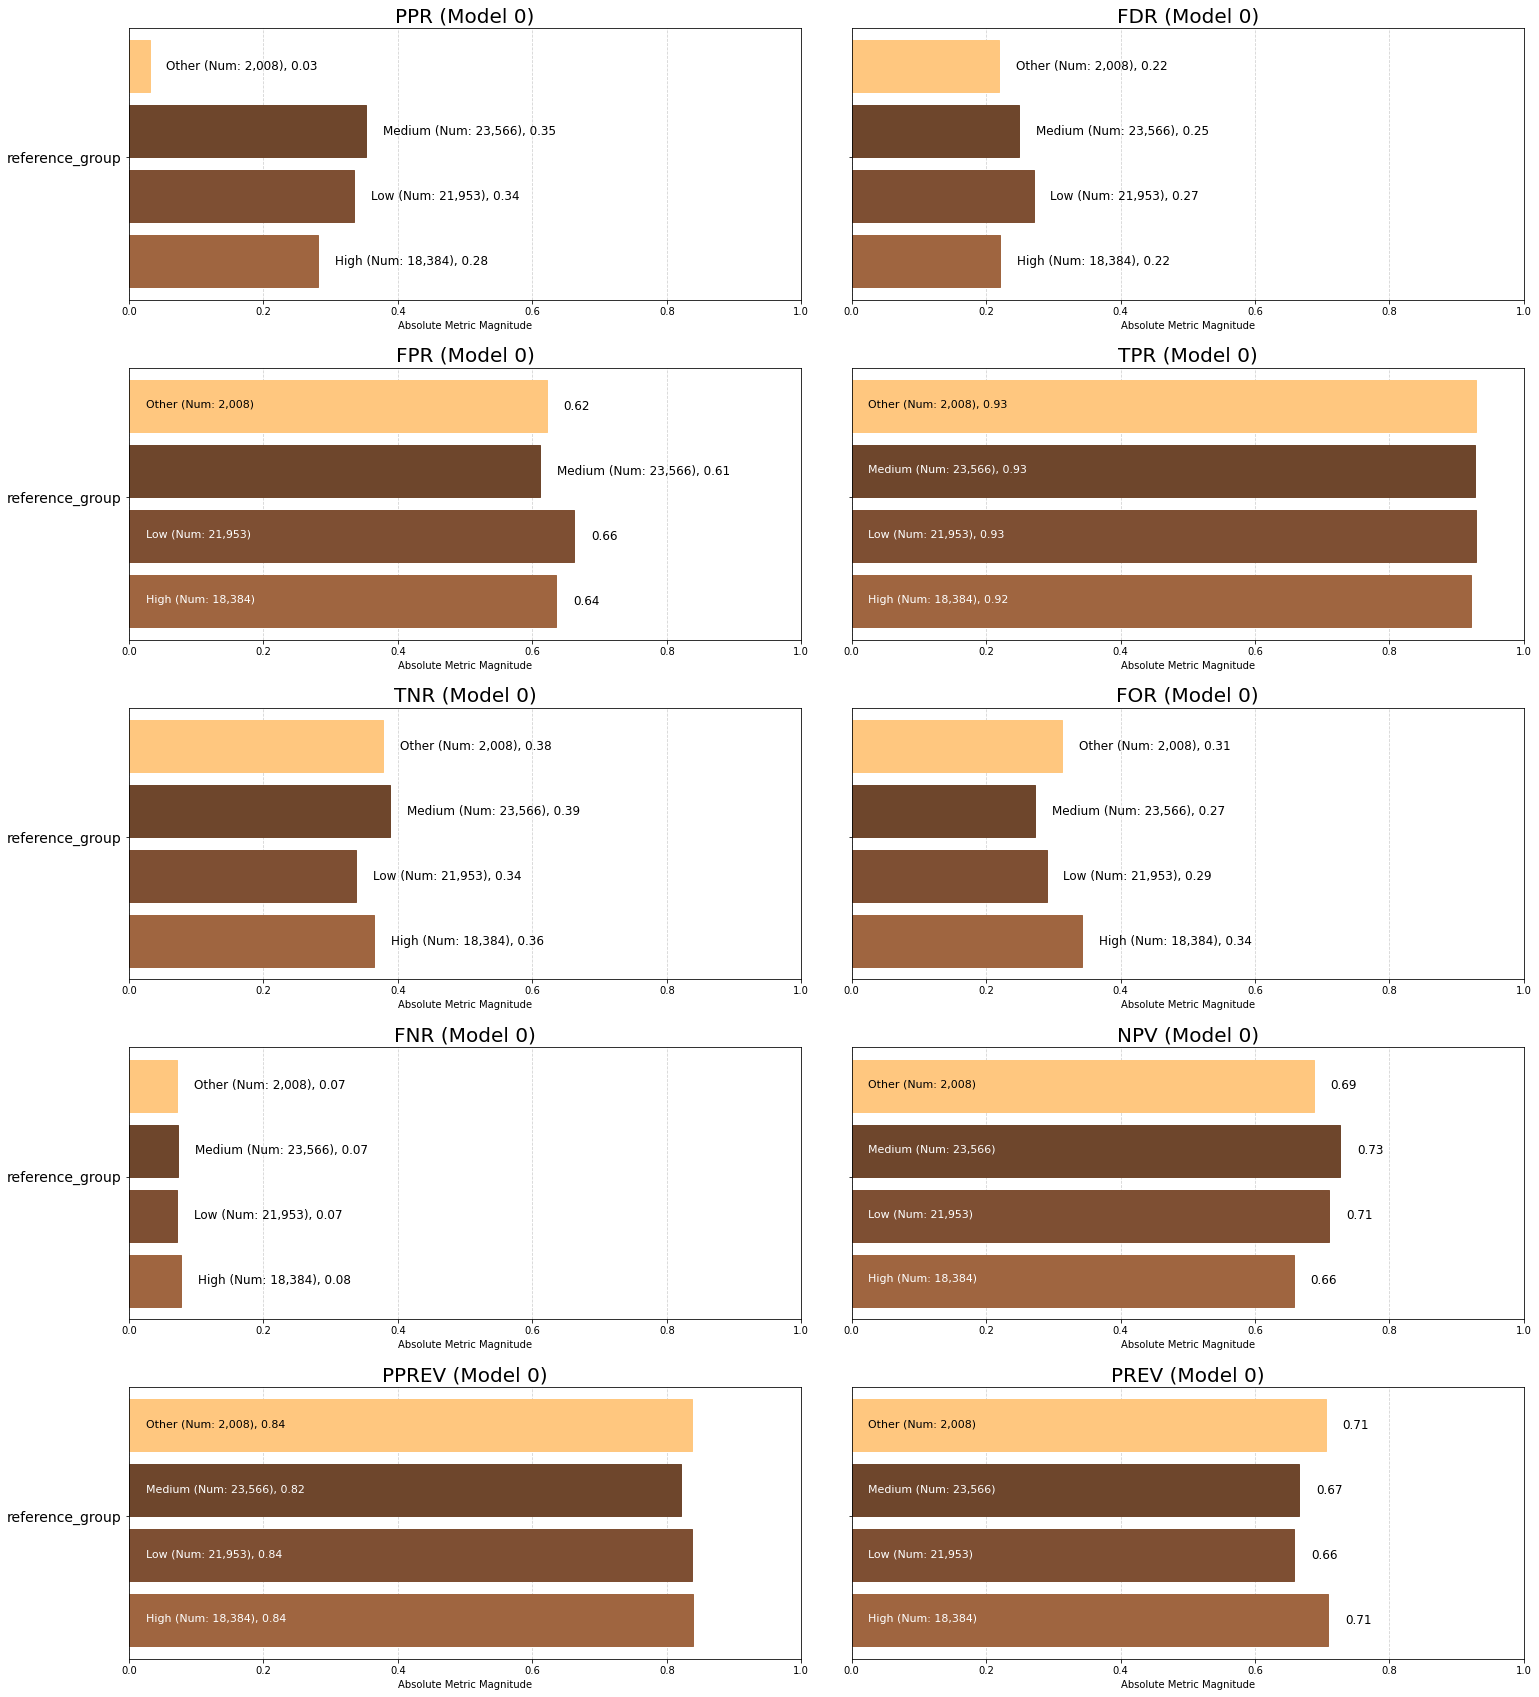

<Figure size 432x288 with 0 Axes>

In [306]:
p = aeq.plot_group_metric_all(xtab, metrics=['ppr','fdr','fpr','tpr','tnr','for','fnr','npv','pprev','prev'], ncols=2)

# Bias

In [362]:
def biasf(df_aeq, xtab):
    """
     args:
         df (dataframe): Recibe el data frame que tiene los features sobre los que queremos medir la disparidad
     returns:
         -
    """
    bias= Bias()
    bdf = bias.get_disparity_predefined_groups(xtab, original_df=df_aeq,
                                               ref_groups_dict={'reference_group':'High'},
                                               alpha=0.05, check_significance=True,
                                        mask_significance=True)
    disparities=bdf[['attribute_name', 'attribute_value'] + bias.list_disparities(bdf)].round(2)
    
    majority_bdf = bias.get_disparity_major_group(xtab, original_df=df_aeq)
    disaparities_majority=majority_bdf[['attribute_name', 'attribute_value'] +  bias.list_disparities(majority_bdf)].round(2)
    
    min_bdf = bias.get_disparity_min_metric(xtab, original_df=df_aeq)
    disaparities_min=min_bdf[['attribute_name', 'attribute_value'] +  bias.list_disparities(min_bdf)].round(2)
    
    return  disparities, disaparities_majority, disaparities_min

In [365]:
biasf(df_aeq, xtab)

get_disparity_predefined_group()
get_disparity_major_group()
get_disparity_min_metric()


(    attribute_name attribute_value  fdr_disparity  fnr_disparity  \
 0  reference_group            High           1.00           1.00   
 1  reference_group             Low           1.23           0.92   
 2  reference_group          Medium           1.13           0.94   
 3  reference_group           Other           0.99           0.92   
 
    for_disparity  fpr_disparity  npv_disparity  ppr_disparity  \
 0           1.00           1.00           1.00           1.00   
 1           0.85           1.04           1.08           1.19   
 2           0.80           0.96           1.11           1.26   
 3           0.91           0.98           1.05           0.11   
 
    pprev_disparity  precision_disparity  tnr_disparity  tpr_disparity  
 0             1.00                 1.00           1.00           1.00  
 1             1.00                 0.94           0.93           1.01  
 2             0.98                 0.96           1.07           1.01  
 3             1.00          

In [356]:
bias = Bias()


In [357]:
bdf = bias.get_disparity_predefined_groups(xtab, original_df=df_aeq, 
                                        ref_groups_dict={'reference_group':'High'}, 
                                        alpha=0.05)
bdf

get_disparity_predefined_group()


,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity,ppr_ref_group_value,pprev_ref_group_value,precision_ref_group_value,fdr_ref_group_value,for_ref_group_value,fpr_ref_group_value,fnr_ref_group_value,tpr_ref_group_value,tnr_ref_group_value,npv_ref_group_value
0,0,binary 0/1,54841,reference_group,High,0.921979,0.364554,0.342770,0.220471,0.635446,0.078021,0.657230,0.779529,15417,2967,0.281122,0.838610,3399,1017,1950,12018,13035,5349,18384,65911,0.709040,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,High,High,High,High,High,High,High,High,High,High
1,0,binary 0/1,54841,reference_group,Low,0.928339,0.337683,0.289835,0.270591,0.662317,0.071661,0.710165,0.729409,18382,3571,0.335187,0.837334,4974,1035,2536,13408,14443,7510,21953,65911,0.657906,1.192320,0.998479,0.935705,1.227331,0.845565,1.042287,0.918487,1.006898,0.926291,1.080544,High,High,High,High,High,High,High,High,High,High
2,0,binary 0/1,54841,reference_group,Medium,0.926801,0.388486,0.273181,0.248554,0.611514,0.073199,0.726819,0.751446,19360,4206,0.353021,0.821523,4812,1149,3057,14548,15697,7869,23566,65911,0.666087,1.255757,0.979624,0.963975,1.127376,0.796980,0.962338,0.938196,1.005230,1.065648,1.105883,High,High,High,High,High,High,High,High,High,High
3,0,binary 0/1,54841,reference_group,Other,0.927966,0.378378,0.312883,0.218787,0.621622,0.072034,0.687117,0.781213,1682,326,0.030670,0.837649,368,102,224,1314,1416,592,2008,65911,0.705179,0.109100,0.998855,1.002160,0.992363,0.912807,0.978245,0.923266,1.006493,1.037921,1.045474,High,High,High,High,High,High,High,High,High,High


In [358]:
# View disparity metrics added to dataframe
bdf_ = bdf[['attribute_name', 'attribute_value'] +
     bias.list_disparities(bdf)].round(2)
bdf_

,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,reference_group,High,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
1,reference_group,Low,1.19,1.00,0.94,1.23,0.85,1.04,0.92,1.01,0.93,1.08
2,reference_group,Medium,1.26,0.98,0.96,1.13,0.80,0.96,0.94,1.01,1.07,1.11
3,reference_group,Other,0.11,1.00,1.00,0.99,0.91,0.98,0.92,1.01,1.04,1.05


In [359]:
bdf_[['attribute_name', 'attribute_value', 'fdr_disparity', 'for_disparity', 'fpr_disparity', 'fnr_disparity']]

,attribute_name,attribute_value,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity
0,reference_group,High,1.00,1.00,1.00,1.00
1,reference_group,Low,1.23,0.85,1.04,0.92
2,reference_group,Medium,1.13,0.80,0.96,0.94
3,reference_group,Other,0.99,0.91,0.98,0.92


In [360]:
majority_bdf = bias.get_disparity_major_group(xtab, original_df=df_aeq)

get_disparity_major_group()


In [375]:
disaparities_majority=majority_bdf[['attribute_name', 'attribute_value'] +  bias.list_disparities(majority_bdf)].round(2)
disaparities_majority

,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,reference_group,High,0.80,1.02,1.04,0.89,1.25,1.04,1.07,0.99,0.94,0.90
1,reference_group,Low,0.95,1.02,0.97,1.09,1.06,1.08,0.98,1.00,0.87,0.98
2,reference_group,Medium,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
3,reference_group,Other,0.09,1.02,1.04,0.88,1.15,1.02,0.98,1.00,0.97,0.95


In [331]:
min_bdf = bias.get_disparity_min_metric(xtab, original_df=df_aeq)

get_disparity_min_metric()


In [376]:
disaparities_min=min_bdf[['attribute_name', 'attribute_value'] +  bias.list_disparities(min_bdf)].round(2)
disaparities_min

,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,reference_group,High,9.17,1.02,1.07,1.01,1.25,1.04,1.09,1.00,1.08,1.00
1,reference_group,Low,10.93,1.02,1.00,1.24,1.06,1.08,1.00,1.01,1.00,1.08
2,reference_group,Medium,11.51,1.00,1.03,1.14,1.00,1.00,1.02,1.01,1.15,1.11
3,reference_group,Other,1.00,1.02,1.07,1.00,1.15,1.02,1.01,1.01,1.12,1.05


In [364]:
bdf[['attribute_name', 'attribute_value'] + bias.list_disparities(bdf)].round(2)

,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,reference_group,High,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
1,reference_group,Low,1.19,1.00,0.94,1.23,0.85,1.04,0.92,1.01,0.93,1.08
2,reference_group,Medium,1.26,0.98,0.96,1.13,0.80,0.96,0.94,1.01,1.07,1.11
3,reference_group,Other,0.11,1.00,1.00,0.99,0.91,0.98,0.92,1.01,1.04,1.05


# Fairness

In [380]:
def fairness(bdf):
    """
     args:
         df (dataframe): Recibe el data frame que tiene los features sobre los que queremos medir la equidad.
     returns:
         -
    """
    fair = Fairness()
    fdf = fair.get_group_value_fairness(bdf)

    fairness=fdf[['attribute_name', 'attribute_value'] + absolute_metrics +
    bias.list_disparities(fdf) + parity_determinations].round(2)
    
    gaf = fair.get_group_attribute_fairness(fdf)
    gof = fair.get_overall_fairness(fdf)


    
    return fairness, gaf, gof

In [381]:
fairness(bdf)

(    attribute_name attribute_value   tpr   tnr   for   fdr   fpr   fnr   npv  \
 0  reference_group            High  0.92  0.36  0.34  0.22  0.64  0.08  0.66   
 1  reference_group             Low  0.93  0.34  0.29  0.27  0.66  0.07  0.71   
 2  reference_group          Medium  0.93  0.39  0.27  0.25  0.61  0.07  0.73   
 3  reference_group           Other  0.93  0.38  0.31  0.22  0.62  0.07  0.69   
 
    precision   ppr  pprev  prev  ppr_disparity  pprev_disparity  \
 0       0.78  0.28   0.84  0.71           1.00             1.00   
 1       0.73  0.34   0.84  0.66           1.19             1.00   
 2       0.75  0.35   0.82  0.67           1.26             0.98   
 3       0.78  0.03   0.84  0.71           0.11             1.00   
 
    precision_disparity  fdr_disparity  for_disparity  fpr_disparity  \
 0                 1.00           1.00           1.00           1.00   
 1                 0.94           1.23           0.85           1.04   
 2                 0.96           1

In [334]:
fair = Fairness()

In [379]:
fdf = fair.get_group_value_fairness(bdf)
fdf

,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity,ppr_ref_group_value,pprev_ref_group_value,precision_ref_group_value,fdr_ref_group_value,for_ref_group_value,fpr_ref_group_value,fnr_ref_group_value,tpr_ref_group_value,tnr_ref_group_value,npv_ref_group_value,Statistical Parity,Impact Parity,FDR Parity,FPR Parity,FOR Parity,FNR Parity,TPR Parity,TNR Parity,NPV Parity,Precision Parity,TypeI Parity,TypeII Parity,Equalized Odds,Unsupervised Fairness,Supervised Fairness
0,0,binary 0/1,54841,reference_group,High,0.921979,0.364554,0.342770,0.220471,0.635446,0.078021,0.657230,0.779529,15417,2967,0.281122,0.838610,3399,1017,1950,12018,13035,5349,18384,65911,0.709040,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,High,High,High,High,High,High,High,High,High,High,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,0,binary 0/1,54841,reference_group,Low,0.928339,0.337683,0.289835,0.270591,0.662317,0.071661,0.710165,0.729409,18382,3571,0.335187,0.837334,4974,1035,2536,13408,14443,7510,21953,65911,0.657906,1.192320,0.998479,0.935705,1.227331,0.845565,1.042287,0.918487,1.006898,0.926291,1.080544,High,High,High,High,High,High,High,High,High,High,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,0,binary 0/1,54841,reference_group,Medium,0.926801,0.388486,0.273181,0.248554,0.611514,0.073199,0.726819,0.751446,19360,4206,0.353021,0.821523,4812,1149,3057,14548,15697,7869,23566,65911,0.666087,1.255757,0.979624,0.963975,1.127376,0.796980,0.962338,0.938196,1.005230,1.065648,1.105883,High,High,High,High,High,High,High,High,High,High,False,True,True,True,False,True,True,True,True,True,True,False,True,False,False
3,0,binary 0/1,54841,reference_group,Other,0.927966,0.378378,0.312883,0.218787,0.621622,0.072034,0.687117,0.781213,1682,326,0.030670,0.837649,368,102,224,1314,1416,592,2008,65911,0.705179,0.109100,0.998855,1.002160,0.992363,0.912807,0.978245,0.923266,1.006493,1.037921,1.045474,High,High,High,High,High,High,High,High,High,High,False,True,True,True,True,True,True,True,True,True,True,True,True,False,True


In [336]:
parity_determinations = fair.list_parities(fdf)
parity_determinations

['TypeII Parity',
 'TNR Parity',
 'Statistical Parity',
 'TPR Parity',
 'NPV Parity',
 'FNR Parity',
 'Precision Parity',
 'Supervised Fairness',
 'TypeI Parity',
 'FDR Parity',
 'FOR Parity',
 'FPR Parity',
 'Impact Parity',
 'Equalized Odds',
 'Unsupervised Fairness']

In [337]:
fdf[['attribute_name', 'attribute_value'] + absolute_metrics + 
    bias.list_disparities(fdf) + parity_determinations].round(2)

,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity,TypeII Parity,TNR Parity,Statistical Parity,TPR Parity,NPV Parity,FNR Parity,Precision Parity,Supervised Fairness,TypeI Parity,FDR Parity,FOR Parity,FPR Parity,Impact Parity,Equalized Odds,Unsupervised Fairness
0,reference_group,High,0.92,0.36,0.34,0.22,0.64,0.08,0.66,0.78,0.28,0.84,0.71,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,reference_group,Low,0.93,0.34,0.29,0.27,0.66,0.07,0.71,0.73,0.34,0.84,0.66,1.19,1.00,0.94,1.23,0.85,1.04,0.92,1.01,0.93,1.08,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,reference_group,Medium,0.93,0.39,0.27,0.25,0.61,0.07,0.73,0.75,0.35,0.82,0.67,1.26,0.98,0.96,1.13,0.80,0.96,0.94,1.01,1.07,1.11,False,True,False,True,True,True,True,False,True,True,False,True,True,True,False
3,reference_group,Other,0.93,0.38,0.31,0.22,0.62,0.07,0.69,0.78,0.03,0.84,0.71,0.11,1.00,1.00,0.99,0.91,0.98,0.92,1.01,1.04,1.05,True,True,False,True,True,True,True,True,True,True,True,True,True,True,False


In [338]:
fairness = fdf[['attribute_name', 'attribute_value'] + absolute_metrics + 
    bias.list_disparities(fdf) + parity_determinations].round(2)

In [339]:
fairness[['attribute_name', 'attribute_value', 'fdr', 'for','fpr','fnr']]

,attribute_name,attribute_value,fdr,for,fpr,fnr
0,reference_group,High,0.22,0.34,0.64,0.08
1,reference_group,Low,0.27,0.29,0.66,0.07
2,reference_group,Medium,0.25,0.27,0.61,0.07
3,reference_group,Other,0.22,0.31,0.62,0.07


In [340]:
gaf = fair.get_group_attribute_fairness(fdf)
gaf

,model_id,score_threshold,attribute_name,Statistical Parity,Impact Parity,FDR Parity,FPR Parity,FOR Parity,FNR Parity,TPR Parity,TNR Parity,NPV Parity,Precision Parity,TypeI Parity,TypeII Parity,Equalized Odds,Unsupervised Fairness,Supervised Fairness
0,0,binary 0/1,reference_group,False,True,True,True,False,True,True,True,True,True,True,False,True,False,False


In [342]:
gof = fair.get_overall_fairness(fdf)
gof

{'Unsupervised Fairness': False,
 'Supervised Fairness': False,
 'Overall Fairness': False}

# Test

In [231]:
#FAILS TEST
df_aeq_fake=df_aeq.loc[:, ['label_value', 'score']]
df_aeq_fake

,label_value,score
0,0,0.0
1,1,1.0
2,1,1.0
3,1,1.0
4,1,1.0
...,...,...
65906,1,1.0
65907,1,0.0
65908,0,1.0
65909,0,0.0


In [236]:
df_aeq_fake.to_pickle('/home/mariana/Documents/DPA/dpa_2021/data/pickles/aequitas_fake.pkl')

In [239]:
df = pd.read_pickle('/home/mariana/Documents/DPA/dpa_2021/data/pickles/aequitas_fake.pkl')
df

,label_value,score
0,0,0.0
1,1,1.0
2,1,1.0
3,1,1.0
4,1,1.0
...,...,...
65906,1,1.0
65907,1,0.0
65908,0,1.0
65909,0,0.0
